'\nser = pd.Series([1, 2, 3, 3])\nplot = ser.plot(kind=\'hist\', title="My plot")\nser.plot(kind=\'hist\', title="My plot")\n'

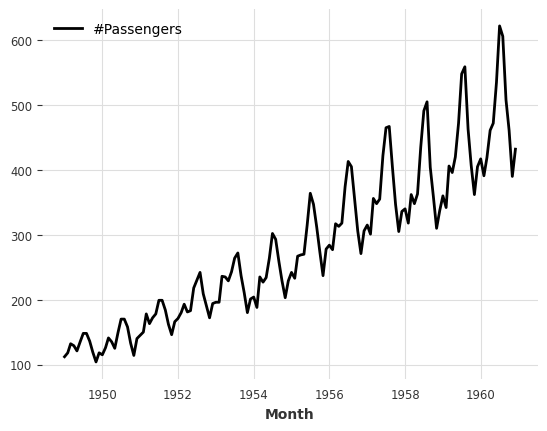

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

series = AirPassengersDataset().load()
series.plot()
'''
ser = pd.Series([1, 2, 3, 3])
plot = ser.plot(kind='hist', title="My plot")
ser.plot(kind='hist', title="My plot")
'''

In [3]:
from darts.models import NaiveMean
series = AirPassengersDataset().load()
model = NaiveMean()
model.fit(series)
pred = model.predict(6)
pred.values()

/home/an/Data/github/moex-access/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[280.29861111],
       [280.29861111],
       [280.29861111],
       [280.29861111],
       [280.29861111],
       [280.29861111]])

<Axes: xlabel='Month'>

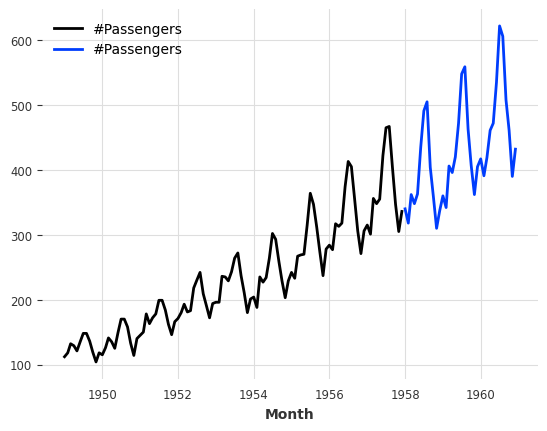

In [4]:
series1, series2 = series.split_after(0.75)
series1.plot()
series2.plot()

0    280.298611
1    280.298611
2    280.298611
3    280.298611
4    280.298611
5    280.298611
dtype: float64


/tmp/ipykernel_40883/777048830.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_vs = pd.Series([float(x) for x in list(pred.values())])


<Axes: >

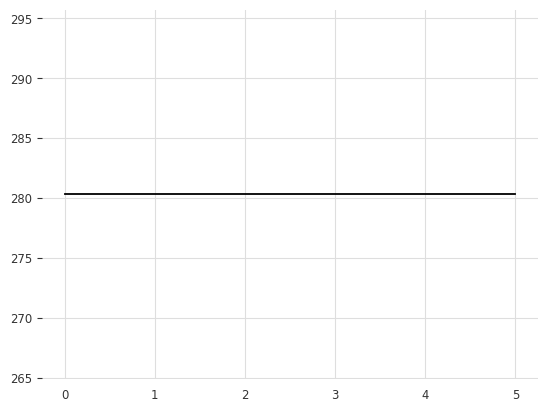

In [14]:
pred_vs = pd.Series([float(x) for x in list(pred.values())])
print(pred_vs)
pred_vs.plot()

In [24]:
from darts.models import RandomForest
model = RandomForest(
    lags=12,
    # lags_past_covariates=12,
    # lags_future_covariates=[0,1,2,3,4,5],
    output_chunk_length=6,
    n_estimators=200,
    criterion="absolute_error",
)
past_cov = len(series)
future_cov = (series)
model.fit(series)
pred = model.predict(6)
pred.values()


array([[437.825],
       [462.705],
       [484.07 ],
       [501.53 ],
       [521.   ],
       [522.325]])

In [31]:
# https://stackoverflow.com/questions/76224143/how-to-convert-darts-timeseries-to-a-series-or-list
series.pd_series().tolist()
# ser_df["#Passengers"]

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0,
 230.0,
 242.0,
 209.0,
 191.0,
 172.0,
 194.0,
 196.0,
 196.0,
 236.0,
 235.0,
 229.0,
 243.0,
 264.0,
 272.0,
 237.0,
 211.0,
 180.0,
 201.0,
 204.0,
 188.0,
 235.0,
 227.0,
 234.0,
 264.0,
 302.0,
 293.0,
 259.0,
 229.0,
 203.0,
 229.0,
 242.0,
 233.0,
 267.0,
 269.0,
 270.0,
 315.0,
 364.0,
 347.0,
 312.0,
 274.0,
 237.0,
 278.0,
 284.0,
 277.0,
 317.0,
 313.0,
 318.0,
 374.0,
 413.0,
 405.0,
 355.0,
 306.0,
 271.0,
 306.0,
 315.0,
 301.0,
 356.0,
 348.0,
 355.0,
 422.0,
 465.0,
 467.0,
 404.0,
 347.0,
 305.0,
 336.0,
 340.0,
 318.0,
 362.0,
 348.0,
 363.0,
 435.0,
 491.0,
 505.0,
 404.0,
 359.0,
 310.0,
 337.0,
 360.0,
 342.0,
 406.0,
 396.0,
 420.0,


/tmp/ipykernel_40883/1122239292.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_list = pd.Series([float(x) for x in list(pred.values())])


<Axes: >

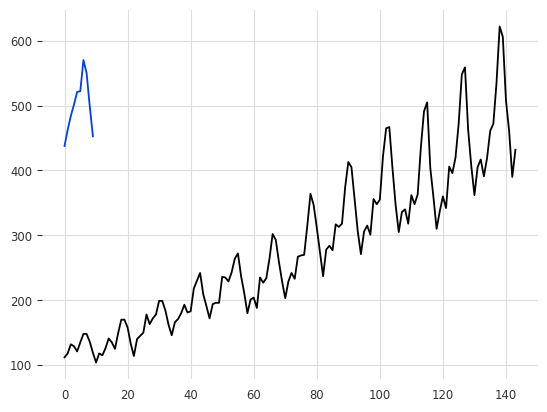

In [36]:
pred = model.predict(10)
series_list = pd.Series(series.pd_series().tolist())
pred_list = pd.Series([float(x) for x in list(pred.values())])
series_list, pred_list
series_list.plot()
pred_list.plot()